In [3]:
# Exploratory Data Analysis: E-Commerce Sales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ecommerce-sales-dataset.csv')
print(df.head())

   Order ID  Order Date Customer Name Region       City   Category  \
0     10001  2024-10-19  Kashvi Varty  South  Bangalore      Books   
1     10002  2025-08-30   Advik Desai  North      Delhi  Groceries   
2     10003  2023-11-04    Rhea Kalla   East      Patna    Kitchen   
3     10004  2025-05-23     Anika Sen   East    Kolkata  Groceries   
4     10005  2025-01-19   Akarsh Kaul   West       Pune   Clothing   

  Sub-Category       Product Name  Quantity  Unit Price  Discount     Sales  \
0  Non-Fiction  Non-Fiction Ipsum         2       36294         5   68958.6   
1         Rice          Rice Nemo         1       42165        20   33732.0   
2       Juicer        Juicer Odio         4       64876        20  207603.2   
3          Oil      Oil Doloribus         5       37320        15  158610.0   
4    Kids Wear      Kids Wear Quo         1       50037        10   45033.3   

     Profit Payment Mode  
0  10525.09   Debit Card  
1   6299.66   Debit Card  
2  19850.27  Credit Car

In [9]:
# Step 1: Dataset Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

df['Order Date'] = pd.to_datetime(df['Order Date'])
print(f"\nDate Range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Total Revenue: ${df['Sales'].sum():,.2f}")

Dataset Shape: (5000, 14)

Data Types:
 Order ID                  int64
Order Date       datetime64[us]
Customer Name               str
Region                      str
City                        str
Category                    str
Sub-Category                str
Product Name                str
Quantity                  int64
Unit Price                int64
Discount                  int64
Sales                   float64
Profit                  float64
Payment Mode                str
dtype: object

Missing Values:
 Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64

Basic Statistics:
            Order ID                  Order Date     Quantity    Unit Price  \
count   5000.000000                        5000  5000.000000   5000.000000   
mean   12500.500000  2024

             total_revenue  avg_order_value  order_count  revenue_pct
Category                                                             
Home Decor     57233222.35        111132.47          515        10.72
Furniture      56647187.90        107489.92          527        10.61
Clothing       55053908.30        107737.59          511        10.32
Books          54932643.00        104039.10          528        10.29
Kitchen        54227902.30        102704.36          528        10.16
Electronics    52587883.95        111415.01          472         9.85
Toys           52227366.45        109262.27          478         9.79
Sports         52069397.25        101897.06          511         9.76
Beauty         50803409.70        110442.20          460         9.52
Groceries      47883103.15        101878.94          470         8.97


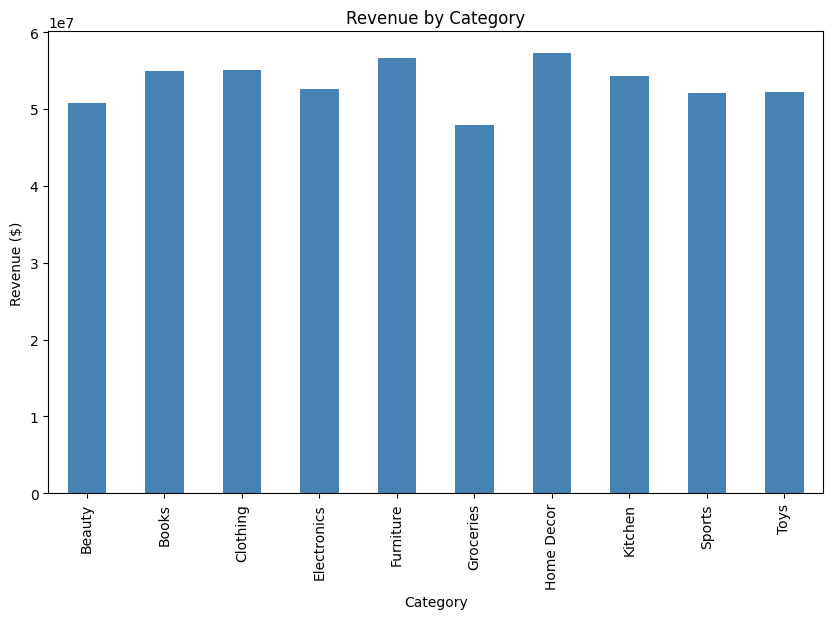

In [13]:
# Step 2: Sales by Category
category_sales = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count']
}).round(2)
category_sales.columns = ['total_revenue', 'avg_order_value', 'order_count']
category_sales['revenue_pct'] = (
    category_sales['total_revenue'] / category_sales['total_revenue'].sum() * 100
).round(2)
print(category_sales.sort_values('total_revenue', ascending=False))

category_sales['total_revenue'].plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title('Revenue by Category')
plt.ylabel('Revenue ($)')
plt.show()

                revenue  avg_order_value  orders  active_customers
Order Date                                                        
2023-10-31  21307522.20    105482.783168     202               202
2023-11-30  22040269.20    108040.535294     204               204
2023-12-31  20624240.25    105765.334615     195               195
2024-01-31  21477241.40     96744.330631     222               222
2024-02-29  19853396.50    101292.839286     196               196
2024-03-31  21571015.35    108397.062060     199               199
2024-04-30  22214781.10    103807.388318     214               214
2024-05-31  24744786.55    114031.274424     217               217
2024-06-30  21368962.50    106313.246269     201               201
2024-07-31  24019283.90    109178.563182     220               220
2024-08-31  23299894.50    101303.889130     230               230
2024-09-30  22480182.05    108077.798317     208               208
2024-10-31  23607626.65    108291.865367     218              

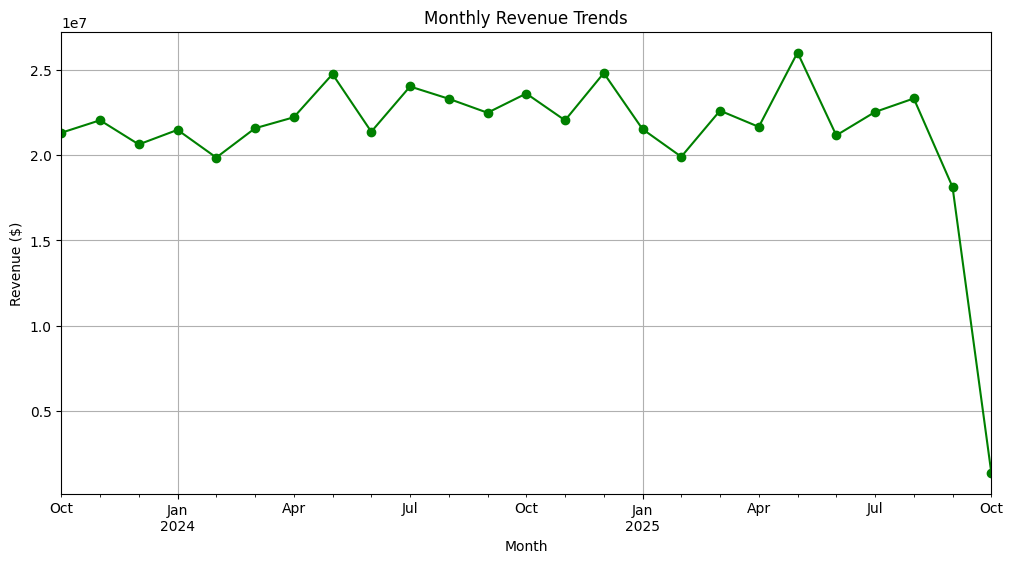

In [16]:
# Step 3: Monthly Sales Trends
df_monthly = df.set_index('Order Date').resample('ME').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Order ID': 'nunique'
})
df_monthly.columns = ['revenue', 'avg_order_value', 'orders', 'active_customers']
print(df_monthly)

df_monthly['revenue'].plot(figsize=(12, 6), marker='o', color='green')
plt.title('Monthly Revenue Trends')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [19]:
# Step 4: Customer Segmentation (RFM Analysis)
current_date = df['Order Date'].max()
rfm = df.groupby('Order ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,
    'Sales': ['count', 'sum', 'mean']
})
rfm.columns = ['recency', 'frequency', 'monetary', 'avg_purchase']

def segment_customer(row):
    if row['recency'] <= 30 and row['frequency'] >= 15:
        return 'VIP'
    elif row['recency'] <= 60 and row['frequency'] >= 3:
        return 'Loyal'
    elif row['recency'] <= 90:
        return 'Active'
    else:
        return 'At Risk'

rfm['segment'] = rfm.apply(segment_customer, axis=1)
segment_summary = rfm.groupby('segment').agg({
    'monetary': ['count', 'mean']
}).round(2)
print(segment_summary)

        monetary           
           count       mean
segment                    
Active       577  107202.84
At Risk     4423  106671.94


                                      total_revenue  avg_price  units_sold  \
Sub-Category Product Name                                                    
Headphones   Headphones Accusantium       857184.20  214296.05           4   
Spices       Spices Quibusdam             687651.25  229217.08           3   
Accessories  Accessories Repellendus      687083.30  229027.77           3   
Bed          Bed Tenetur                  670994.80  223664.93           3   
Laptop       Laptop Similique             666640.60  222213.53           3   
Lamp         Lamp Enim                    665920.20  166480.05           4   
Shampoo      Shampoo Commodi              659546.60  219848.87           3   
Lamp         Lamp Veritatis               652909.50  217636.50           3   
Men's Wear   Men's Wear Voluptatibus      649048.00  324524.00           2   
Textbook     Textbook Omnis               633246.25  211082.08           3   

                                      revenue_rank  
Sub-Catego

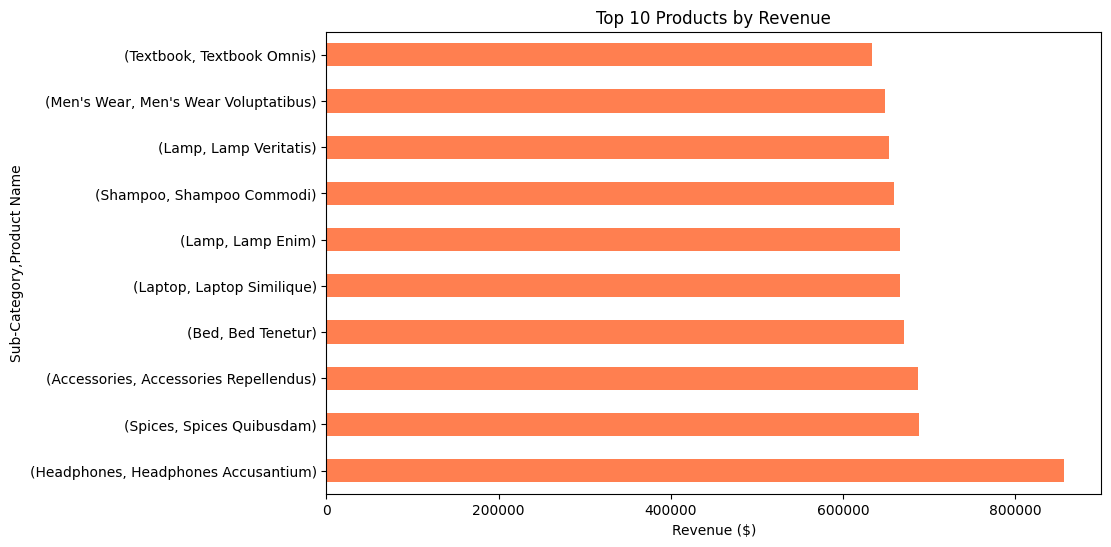

In [22]:
# Step 5: Top Products Analysis
top_products = df.groupby(['Sub-Category', 'Product Name']).agg({
    'Sales': ['sum', 'mean', 'count']
}).round(2)
top_products.columns = ['total_revenue', 'avg_price', 'units_sold']
top_products['revenue_rank'] = top_products['total_revenue'].rank(ascending=False)
top_products = top_products.sort_values('total_revenue', ascending=False).head(10)
print(top_products)

top_products['total_revenue'].plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue ($)')
plt.show()

In [23]:
# Step 6: Geographic Analysis
geo_analysis = df.groupby('Region').agg({
    'Order ID': 'nunique',
    'Sales': ['count', 'sum', 'mean']
}).round(2)
geo_analysis.columns = ['customers', 'orders', 'revenue', 'avg_order_value']
geo_analysis['market_share'] = (
    geo_analysis['revenue'] / geo_analysis['revenue'].sum() * 100
).round(2)
print(geo_analysis.sort_values('revenue', ascending=False))

        customers  orders       revenue  avg_order_value  market_share
Region                                                                
North        1288    1288  1.435782e+08        111473.79         26.90
East         1256    1256  1.358116e+08        108130.28         25.45
West         1241    1241  1.310460e+08        105597.08         24.56
South        1215    1215  1.232302e+08        101424.01         23.09


In [33]:
# Step 7: Summary Dashboard
current_month = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(months=1)] 
previous_month = df[(df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(months=2)) & (df['Order Date'] < df['Order Date'].max() - pd.DateOffset(months=1))] 

summary = {
    'current_orders': len(current_month),
    'previous_orders': len(previous_month),
    'current_revenue': current_month['Sales'].sum(),
    'previous_revenue': previous_month['Sales'].sum(),
    'current_customers': current_month['Order ID'].nunique(),
    'previous_customers': previous_month['Order ID'].nunique(),
}

summary['order_growth_pct'] = ((summary['current_orders'] - summary['previous_orders']) / summary['previous_orders'] * 100)
summary['revenue_growth_pct'] = ((summary['current_revenue'] - summary['previous_revenue']) / summary['previous_revenue'] * 100).round(2)
summary['revenue_per_customer'] = (summary['current_revenue'] / summary['current_customers']).round(2)

print("\nGrowth Metrics:")
for key, value in summary.items():
    print(f"{key}: {value}")


Growth Metrics:
current_orders: 183
previous_orders: 222
current_revenue: 17303663.5
previous_revenue: 24309750.15
current_customers: 183
previous_customers: 222
order_growth_pct: -17.56756756756757
revenue_growth_pct: -28.82
revenue_per_customer: 94555.54
